In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.svm import SVC

In [ ]:
noise =0.02

In [ ]:
X,Y=make_circles(n_samples=500,noise=noise)


In [ ]:
X.shape

(500, 2)

In [ ]:
Y2=Y.reshape(-1,1)

In [ ]:
Y2.shape

(500, 1)

In [ ]:
XY=np.hstack((X,Y2))

In [ ]:
XY.shape

(500, 3)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
x_train.shape

(400, 2)

In [ ]:
x_test.shape

(100, 2)

In [ ]:
model1=SVC(kernel='rbf')

In [ ]:
%%time
model1.fit(x_train,y_train)

CPU times: user 4.86 ms, sys: 753 µs, total: 5.61 ms
Wall time: 7.45 ms


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
def PlotSVM(X, y, model, title="SVM", xmin=-2, xmax=2, ymin=-2, ymax=2):    
  import matplotlib as mpl    
  XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),np.arange(ymin, ymax, (ymax-ymin)/1000))    
  ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)    
  fig = plt.figure(figsize=(7,7))   
  plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)    
  plt.scatter(X[:, 0], X[:, 1], c=y)    
  plt.xlim(xmin, xmax)    
  plt.ylim(ymin, ymax)    
  plt.title(title)   
  plt.xlabel("x1")    
  plt.ylabel("x2") 

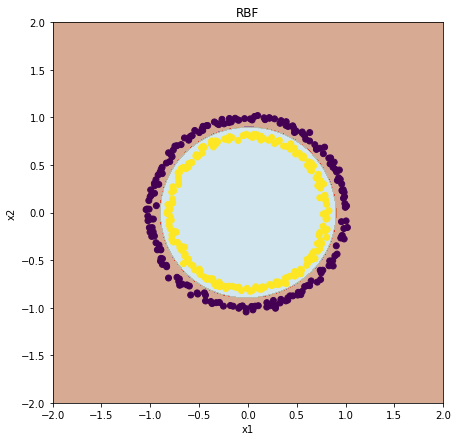

In [ ]:
PlotSVM(x_train,y_train,model1,title='RBF')

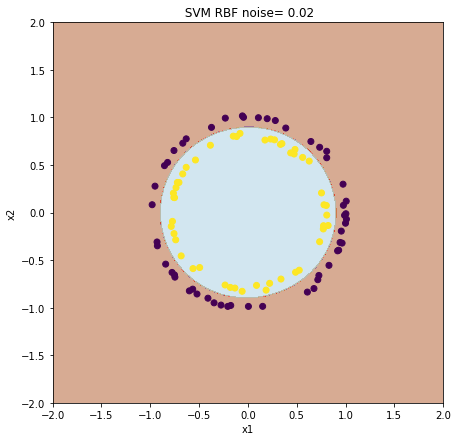

In [ ]:
PlotSVM(x_test,y_test,model1,title=' SVM RBF noise= {}'.format(noise))

In [ ]:
predictions= model1.predict(x_test)

In [ ]:
predictions #예측결과

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
y_test #정답

array([1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
model1.score(x_test,y_test)

1.0

In [ ]:
import pandas as pd

##confusion matrix


In [ ]:
conf_matrix =pd.crosstab(y_test,predictions)
print(conf_matrix)

col_0   0   1
row_0        
0      52   0
1       0  48


In [ ]:
y_test.shape

(100,)

In [ ]:
predictions.shape

(100,)